In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
accidents_19 = pd.read_csv("Data/Road Safety Data - Accidents 2019.csv", low_memory=False)
accidents_18 = pd.read_csv("Data/dftRoadSafetyData_Accidents_2018.csv", low_memory=False)
accidents_17 = pd.read_csv("Data/dftRoadSafetyData_Accidents_2017.csv", low_memory=False)
accidents_16 = pd.read_csv("Data/dftRoadSafety_Accidents_2016.csv", low_memory=False)
accidents_15 = pd.read_csv("Data/Accidents_2015.csv", low_memory=False)

In [3]:
accidents_list = [accidents_19, accidents_18, accidents_17, accidents_16, accidents_15]
accidents = pd.concat(accidents_list)

In [4]:
vehicles_19 = pd.read_csv("Data/Road Safety Data- Vehicles 2019.csv", low_memory=False)
vehicles_18 = pd.read_csv("Data/dftRoadSafetyData_Vehicles_2018.csv", low_memory=False)
vehicles_17 = pd.read_csv("Data/dftRoadSafetyData_Vehicles_2017.csv", low_memory=False)
vehicles_16 = pd.read_csv("Data/dftRoadSafetyData_Vehicles_2016.csv", low_memory=False)
vehicles_15 = pd.read_csv("Data/Vehicles_2015.csv", low_memory=False)

In [5]:
vehicles_list = [vehicles_19, vehicles_18, vehicles_17, vehicles_16, vehicles_15]
vehicles = pd.concat(vehicles_list)

In [6]:
casualties_19 = pd.read_csv("Data/Road Safety Data - Casualties 2019.csv", low_memory=False)
casualties_18 = pd.read_csv("Data/dftRoadSafetyData_Casualties_2018.csv", low_memory=False)
casualties_17 = pd.read_csv("Data/dftRoadSafetyData_Casualties_2017.csv", low_memory=False)
casualties_16 = pd.read_csv("Data/dftRoadSafetyData_Casualties_2016.csv", low_memory=False)
casualties_15 = pd.read_csv("Data/Casualties_2015.csv", low_memory=False)

In [7]:
casualties_list = [casualties_19, casualties_18, casualties_17, casualties_16, casualties_15]
casualties = pd.concat(casualties_list)

In [8]:
# Filters casualties by casualty class = 'driver or rider' and casualty type = 'cyclist'
cyclist_casualties = casualties.loc[(casualties['Casualty_Class'] == 1) & (casualties['Casualty_Type'] == 1)].copy()

In [9]:
# Filters accidents by those where one of the casualties was a cyclist
indices = cyclist_casualties.loc[:,'Accident_Index']
cyclist_accidents = accidents.loc[accidents['Accident_Index'].isin(indices)].copy()

In [10]:
cyclist_accidents = cyclist_accidents.drop(columns=['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
                                                   'Latitude', 'Police_Force', 'Local_Authority_(District)', 
                                                   'Local_Authority_(Highway)', '1st_Road_Number', '2nd_Road_Number',
                                                    'Pedestrian_Crossing-Human_Control',
                                                    'Pedestrian_Crossing-Physical_Facilities',
                                                    'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location'])

In [12]:
# Bins date column into months and time column into hours
dates = pd.to_datetime(cyclist_accidents['Date'], format='%d/%m/%Y')
cyclist_accidents['Month'] = dates.dt.month

times = pd.to_datetime(cyclist_accidents['Time'], format='%H:%M')
cyclist_accidents['Hour'] = times.dt.hour

In [13]:
# Gets frequency data for all variables
cols_list = ['Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties','Month', 'Day_of_Week', 'Hour', '1st_Road_Class',
            'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class', 'Light_Conditions',
            'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards',
            'Urban_or_Rural_Area']
x_list = []
y_list = []

for x in cols_list:
    counts = cyclist_accidents[x].value_counts().reset_index()
    x_list.append(counts['index'])
    y_list.append(counts[x])

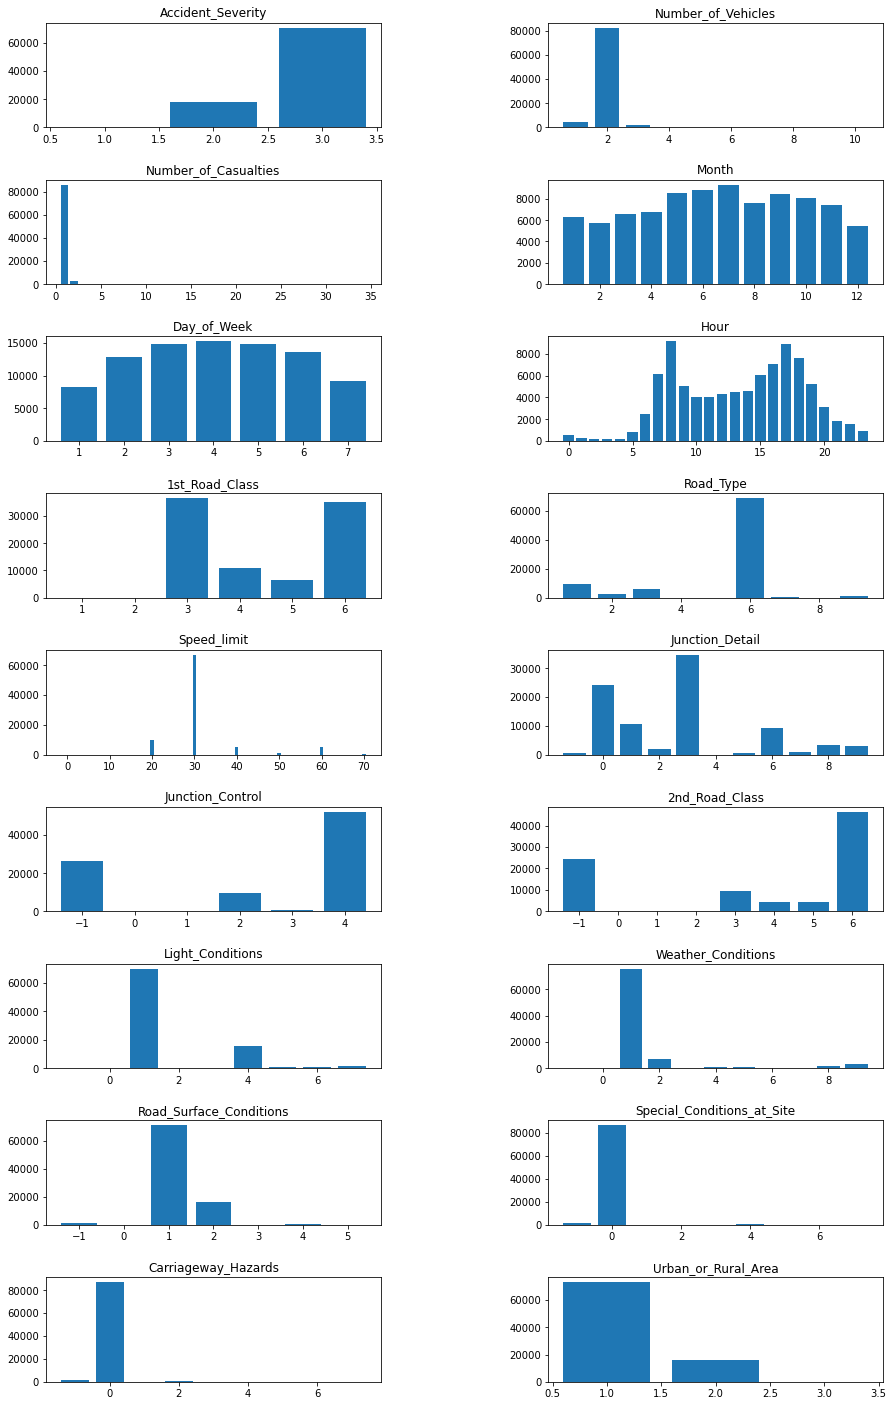

In [14]:
# Displays bar plots for every variable
fig, axs = plt.subplots(9,2, figsize=(15,25))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axs = axs.ravel()

for i in range(18):
    axs[i].bar(x_list[i], y_list[i])
    axs[i].set_title(cols_list[i])